In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output




In [7]:
# Load dataset
df = pd.read_csv("imdb_top_1000.csv")

# Extract main genre (first one in list)
df["Main_Genre"] = df["Genre"].str.split(",").str[0]

# Clean Gross column (remove commas, convert to float)
df["Gross"] = df["Gross"].str.replace(",", "", regex=True).astype(float)

df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Main_Genre
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime


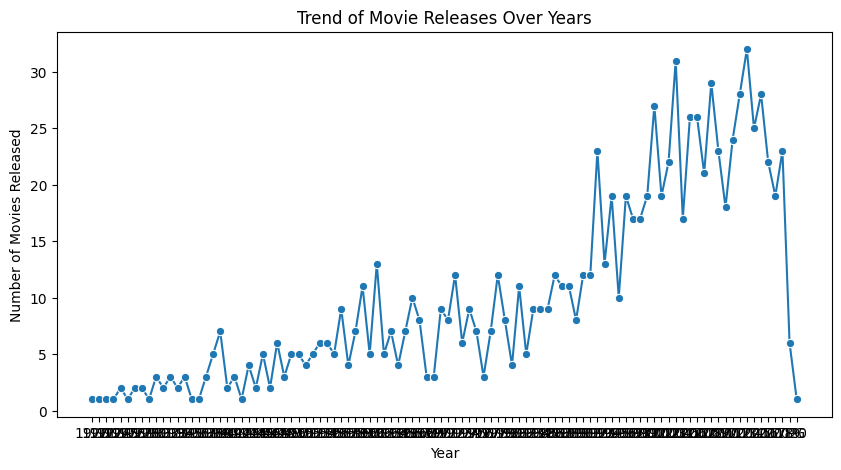

In [8]:
release_trend = df.groupby("Released_Year").size().reset_index(name="movie_count")

plt.figure(figsize=(10, 5))
sns.lineplot(data=release_trend, x="Released_Year", y="movie_count", marker="o")
plt.title("Trend of Movie Releases Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.show()


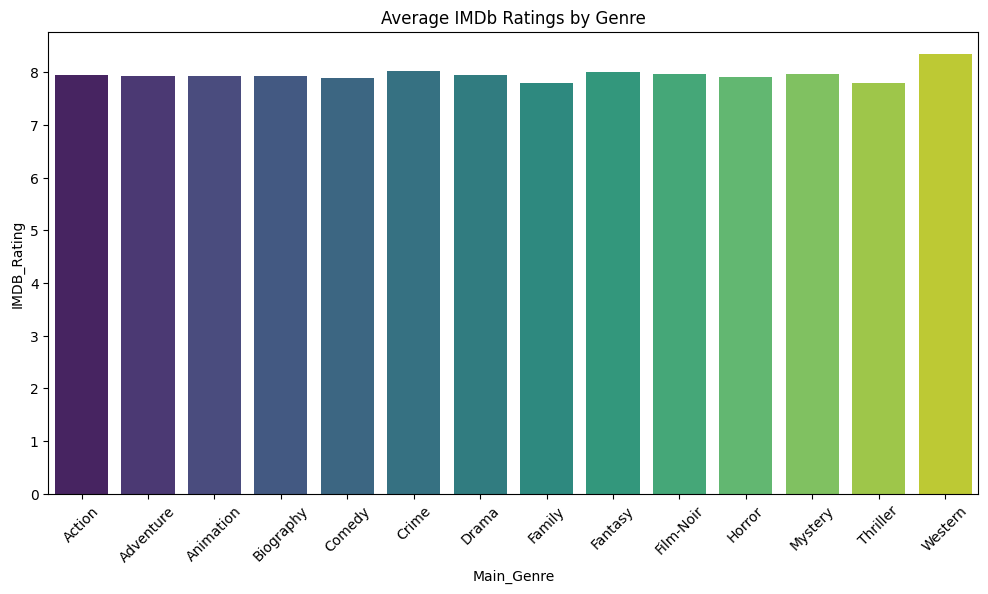

In [9]:
avg_ratings = df.groupby("Main_Genre")["IMDB_Rating"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_ratings,
    x="Main_Genre",
    y="IMDB_Rating",
    hue="Main_Genre",
    palette="viridis",
    legend=False
)
plt.xticks(rotation=45)
plt.title("Average IMDb Ratings by Genre")
plt.show()


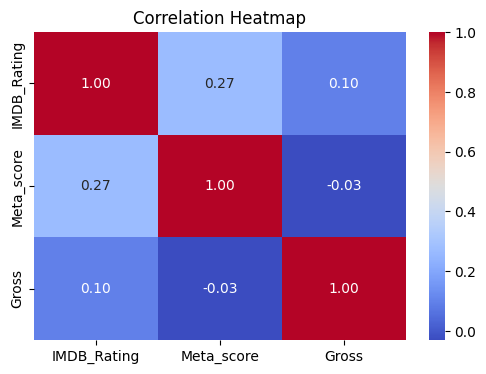

In [10]:
corr = df[["IMDB_Rating", "Meta_score", "Gross"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


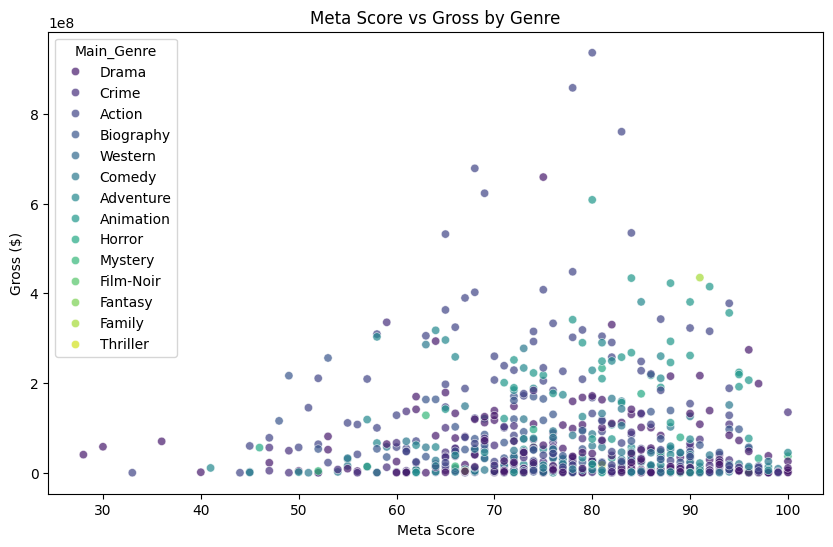

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Meta_score",
    y="Gross",
    hue="Main_Genre",
    palette="viridis",
    alpha=0.7
)
plt.title("Meta Score vs Gross by Genre")
plt.xlabel("Meta Score")
plt.ylabel("Gross ($)")
plt.show()


In [24]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# --- Clean Released_Year column ---
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df = df.dropna(subset=["Released_Year"])
df["Released_Year"] = df["Released_Year"].astype(int)

# --- Create Dash app ---
app = Dash(__name__)

app.layout = html.Div([
    html.H1("🎬 IMDb Top 1000 Movie Analytics Dashboard"),

    dcc.Dropdown(
        id="genre_filter",
        options=[{"label": g, "value": g} for g in df["Main_Genre"].unique()],
        multi=True,
        placeholder="Select Genre(s)"
    ),

    dcc.Slider(
        id="year_slider",
        min=int(df["Released_Year"].min()),
        max=int(df["Released_Year"].max()),
        value=int(df["Released_Year"].min()),
        marks={str(year): str(year) for year in range(int(df["Released_Year"].min()), int(df["Released_Year"].max())+1, 10)},
        step=1
    ),

    dcc.Graph(id="scatter_plot")
])

@app.callback(
    Output("scatter_plot", "figure"),
    [Input("genre_filter", "value"),
     Input("year_slider", "value")]
)
def update_scatter(selected_genres, selected_year):
    filtered_df = df[df["Released_Year"] >= selected_year]

    if selected_genres:
        filtered_df = filtered_df[filtered_df["Main_Genre"].isin(selected_genres)]

    fig = px.scatter(
        filtered_df, x="Meta_score", y="Gross",
        color="Main_Genre",
        hover_data=["Series_Title", "IMDB_Rating"],
        title=f"Gross vs Meta Score (from {selected_year} onwards)"
    )
    return fig

# --- Run inline inside Jupyter ---
app.run(jupyter_mode="inline", debug=True)


In [19]:
!pip install jupyter-dash



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
